# Machine Learning

## Load the data

In [2]:
import pandas as pd

df_premier = pd.read_excel('premier_league.xlsx', index_col=0)
df_premier

,goals,points
team,,
Manchester City,99,93
Liverpool,94,92
...,...,...
Watford,34,23
Norwich City,23,22


## Select the variables for the model

1. y: the variable you want to predict
2. X: the variable you will use to calculate the prediction y

In [3]:
X=df_premier[['goals']]
y=df_premier.points

## The Linear Regression ML Model

### Fit the model with the data

In [4]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

In [5]:
model_lr.fit(X, y)

LinearRegression()

### Predictions

#### Calculate the predictions

In [6]:
y_pred = model_lr.predict(X)
y_pred

array([95.56258909, 90.83623165, 73.82134488, 67.20444448, 59.64227258,
       55.86118663, 58.69700109, 60.58754407, 41.68211432, 37.90102838,
       43.5726573 , 49.24428622, 47.35374325, 51.1348292 , 42.62738581,
       42.62738581, 41.68211432, 34.11994243, 34.11994243, 23.72195607])

#### Add them to the DataFrame

In [7]:
df_premier['points_pred_lr'] = y_pred
df_premier

,goals,points,points_pred_lr
team,,,
Manchester City,99,93,95.562589
Liverpool,94,92,90.836232
...,...,...,...
Watford,34,23,34.119942
Norwich City,23,22,23.721956


### Model evaluation

#### Calculate the model's score

In [8]:
r2 = model_lr.score(X, y)
r2

0.9036097775581716

#### Calculate the squared root of the score

- Isn't it the same than the `r` from Pearson's correlation?

In [9]:
import numpy as np

In [10]:
np.sqrt(r2)

0.950583914001374

### Model Interpretation

#### Visualize the model with the real data

In [11]:
import seaborn as sns

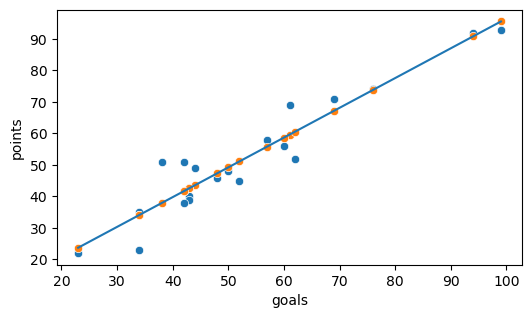

In [12]:
sns.scatterplot(data=df_premier, x='goals', y='points')
sns.scatterplot(data=df_premier, x='goals', y='points_pred_lr')
sns.lineplot(data=df_premier, x='goals', y='points_pred_lr');

#### Add the legend to the chart

- Google may help

In [13]:
import matplotlib.pyplot as plt

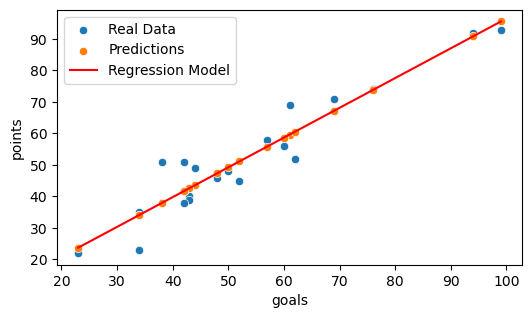

In [14]:
sns.scatterplot(data=df_premier, x='goals', y='points', label='Real Data')
sns.scatterplot(data=df_premier, x='goals', y='points_pred_lr', label='Predictions')
sns.lineplot(data=df_premier, x='goals', y='points_pred_lr', color='red', label='Regression Model')
plt.legend();

#### Interpret the model's mathematical formula

In [15]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['goals'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.94527149]),
 'rank_': 1,
 'singular_': array([84.79946934]),
 'intercept_': 1.9807118669995134}

$$
points = 1.98 + 0.94 \cdot goals
$$

## The Random Forest ML Model

Within `ensemble` module from `sklearn`

### Fit the model with the data

In [16]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [17]:
model_rf.fit(X, y)

RandomForestRegressor()

### Predictions

#### Calculate the predictions

In [18]:
y_pred = model_rf.predict(X)
y_pred

array([90.24      , 89.85      , 72.13      , 67.33      , 62.68      ,
       57.51      , 57.22      , 56.18      , 44.56016667, 43.59333333,
       45.94133333, 47.4       , 46.84      , 46.28      , 39.974     ,
       39.974     , 44.56016667, 31.24133333, 31.24133333, 24.73666667])

#### Add them to the DataFrame

In [19]:
df_premier['points_pred_rf'] = y_pred
df_premier

,goals,points,points_pred_lr,points_pred_rf
team,,,,
Manchester City,99,93,95.562589,90.240000
Liverpool,94,92,90.836232,89.850000
...,...,...,...,...
Watford,34,23,34.119942,31.241333
Norwich City,23,22,23.721956,24.736667


### Model evaluation

#### Calculate the model's score

In [20]:
r2 = model_rf.score(X, y)
r2

0.9535550937150375

### Model Interpretation

#### Visualize the model with the real data

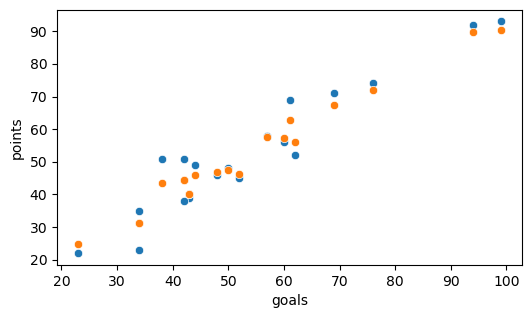

In [21]:
sns.scatterplot(data=df_premier, x='goals', y='points')
sns.scatterplot(data=df_premier, x='goals', y='points_pred_rf');

#### Add the legend to the chart

- Google may help

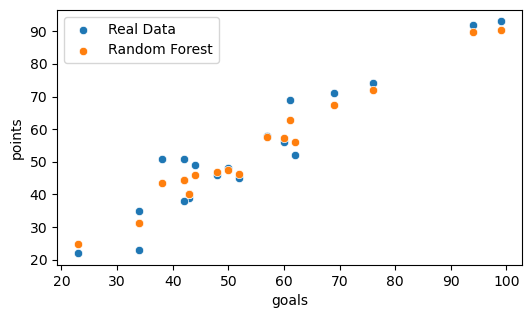

In [22]:
sns.scatterplot(data=df_premier, x='goals', y='points', label='Real Data')
sns.scatterplot(data=df_premier, x='goals', y='points_pred_rf', label='Random Forest')
plt.legend();

#### Interpret the model's mathematical formula

In [23]:
model_rf.__dict__

{'base_estimator': DecisionTreeRegressor(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'squared_error',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['goals'], dtype=object),
 'n_features_in_': 1,
 'n_outputs_': 1,
 'base_estimator_': DecisionTreeRegressor(),
 'estimators_': [DecisionTreeRegressor(max_features=1.0, random_state=2018010083),
  DecisionTreeRegressor(max_features=1.0, random_state=1666258633),
  DecisionTreeRegressor(ma

## The K Nearest Neighbours ML Model

### Fit the model with the data

In [24]:
from sklearn.neighbors import KNeighborsRegressor

model_kn = KNeighborsRegressor()

In [25]:
model_kn.fit(X, y)

KNeighborsRegressor()

### Predictions

#### Calculate the predictions

In [26]:
y_pred = model_kn.predict(X)
y_pred

array([76.4, 76.4, 64.4, 64.4, 61.2, 56. , 56. , 61.2, 43.4, 39.6, 43.4,
       49.2, 45.6, 49.2, 43.4, 43.4, 43.4, 39.6, 39.6, 36.4])

#### Add them to the DataFrame

In [27]:
df_premier['points_pred_kn'] = y_pred
df_premier

,goals,points,points_pred_lr,points_pred_rf,points_pred_kn
team,,,,,
Manchester City,99,93,95.562589,90.240000,76.4
Liverpool,94,92,90.836232,89.850000,76.4
...,...,...,...,...,...
Watford,34,23,34.119942,31.241333,39.6
Norwich City,23,22,23.721956,24.736667,36.4


### Model evaluation

#### Calculate the model's score

In [28]:
r2 = model_kn.score(X, y)
r2

0.7740619902120718

### Model Interpretation

#### Visualize the model with the real data

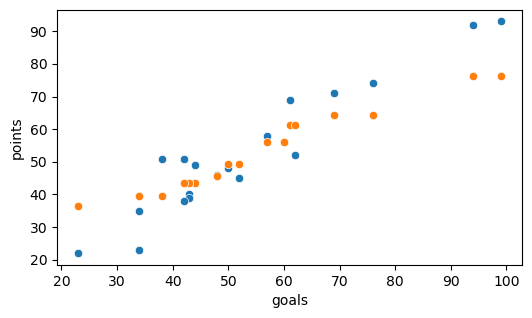

In [29]:
sns.scatterplot(data=df_premier, x='goals', y='points')
sns.scatterplot(data=df_premier, x='goals', y='points_pred_kn');

#### Add the legend to the chart

- Google may help

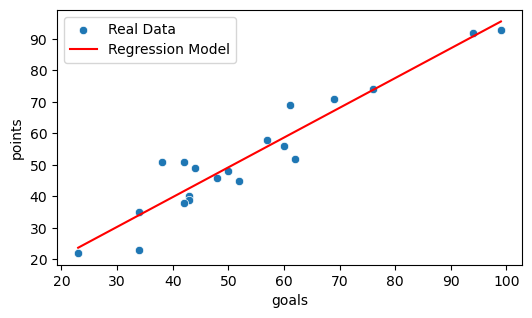

In [30]:
sns.scatterplot(data=df_premier, x='goals', y='points', label='Real Data')
sns.lineplot(data=df_premier, x='goals', y='points_pred_lr', color='red', label='Regression Model')
plt.legend();

#### Interpret the model's mathematical formula

In [31]:
model_kn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'feature_names_in_': array(['goals'], dtype=object),
 'n_features_in_': 1,
 '_y': array([93, 92, 74, 71, 69, 58, 56, 52, 51, 51, 49, 48, 46, 45, 40, 39, 38,
        35, 23, 22]),
 'effective_metric_params_': {},
 'effective_metric_': 'euclidean',
 '_fit_method': 'kd_tree',
 '_fit_X': array([[99],
        [94],
        [76],
        [69],
        [61],
        [57],
        [60],
        [62],
        [42],
        [38],
        [44],
        [50],
        [48],
        [52],
        [43],
        [43],
        [42],
        [34],
        [34],
        [23]]),
 'n_samples_fit_': 20,
 '_tree': <sklearn.neighbors._kd_tree.KDTree at 0x159884810>}

## Choose the best model

### Visualize all models

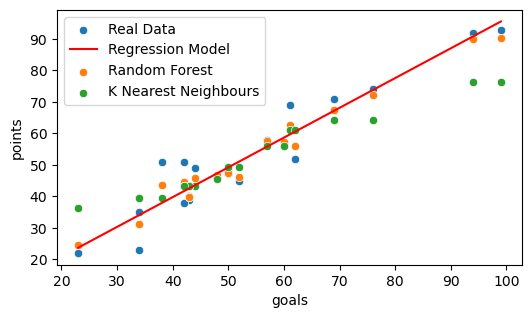

In [32]:
sns.scatterplot(data=df_premier, x='goals', y='points', label='Real Data')
sns.lineplot(data=df_premier, x='goals', y='points_pred_lr', color='red', label='Regression Model')
sns.scatterplot(data=df_premier, x='goals', y='points_pred_rf', label='Random Forest')
sns.scatterplot(data=df_premier, x='goals', y='points_pred_kn', label='K Nearest Neighbours')
plt.legend();

### Calculate the score

In [52]:
score_lr = model_lr.score(X, y)
score_rf = model_rf.score(X, y)
score_kn = model_kn.score(X, y)

pd.DataFrame({
    'Linear Regression': score_lr,
    'K Nearest Neighbors': score_kn,
    'Random Forest': score_rf
}, index=['score'])

,Linear Regression,K Nearest Neighbors,Random Forest
score,0.90361,0.774062,0.953555
